In [1]:
import torch
from torch import nn

In [2]:
import sys
sys.path.append('..')
from common import d2l

#### 1. 定义LeNet模型

In [3]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),  # 卷积层1
    nn.Sigmoid(),  # 激活函数
    nn.AvgPool2d(kernel_size=2, stride=2),  # 平均池化层1
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),  # 卷积层2
    nn.AvgPool2d(kernel_size=2, stride=2),  # 池化层2
    nn.Flatten(),  # 拉平（除了样本编号，其余合成一维）
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),  # 线性全连接层1
    nn.Linear(120, 84), nn.Sigmoid(),  # 全连接层2
    nn.Linear(84, 10)  # 全连接层3  
)

In [4]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print("{:<{width}} 输出 shape: {}".format(layer.__class__.__name__, X.shape, width=12))

Conv2d       输出 shape: torch.Size([1, 6, 28, 28])
Sigmoid      输出 shape: torch.Size([1, 6, 28, 28])
AvgPool2d    输出 shape: torch.Size([1, 6, 14, 14])
Conv2d       输出 shape: torch.Size([1, 16, 10, 10])
Sigmoid      输出 shape: torch.Size([1, 16, 10, 10])
AvgPool2d    输出 shape: torch.Size([1, 16, 5, 5])
Flatten      输出 shape: torch.Size([1, 400])
Linear       输出 shape: torch.Size([1, 120])
Sigmoid      输出 shape: torch.Size([1, 120])
Linear       输出 shape: torch.Size([1, 84])
Sigmoid      输出 shape: torch.Size([1, 84])
Linear       输出 shape: torch.Size([1, 10])


#### 2. 训练模型

In [5]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

损失 0.463, 训练精度 0.827,  测试精度 0.784
1424.8 个样本/秒 在 cpu 上


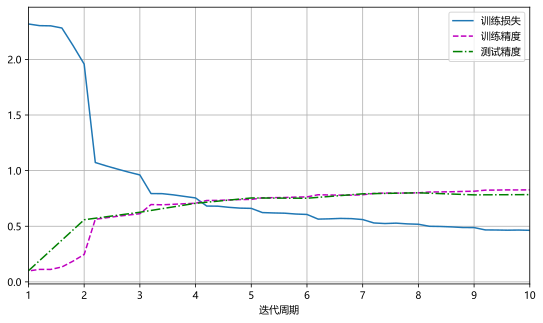

In [6]:
lr, num_epochs = 0.9, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())